### import packages

In [9]:
import pandas as pd 
import pathlib
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import time

### import data 

In [10]:
data_train= pd.read_csv(r"C:\Users\HP\Desktop\python\seconde_projet\test.csv")
data_test= pd.read_csv("C:/Users/HP/Desktop/python/seconde_projet/test.csv")
df_test=pd.DataFrame(data_test)
df_train=pd.DataFrame(data_train)
df_train.head()
df_test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


### marge data 

In [11]:
data_new = pd.concat([data_train, data_test], axis=0)

data_new.reset_index(drop=True, inplace=True)
data_new.to_csv("webesite_data.csv", index=False)
print(data_new.shape)

(100000, 27)


In [12]:
df=data_new
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

### Credit Dataset – Feature Dictionary & Business Context

| Feature Name              | Description                                                                 | Business Context                                                                 |
|---------------------------|-----------------------------------------------------------------------------|----------------------------------------------------------------------------------|
| `ID`                      | Unique record identifier.                                                   | Used for internal tracking; not relevant for modeling.                          |
| `Customer_ID`             | Unique customer identifier.                                                 | Allows joining across datasets; customer-level analysis.                        |
| `Month`                   | Observation month.                                                          | Useful for time-series or trend analysis.                                       |
| `Name`                    | Full customer name.                                                         | For identity verification or anonymization.                                     |
| `Age`                     | Customer's age.                                                             | Age impacts credit eligibility and loan limits.                                 |
| `SSN`                     | Social Security Number.                                                     | Sensitive; used for identity and fraud checks.                                  |
| `Occupation`              | Job title or sector.                                                        | Influences income stability and risk assessment.                                |
| `Annual_Income`           | Total income earned yearly.                                                 | Key input to affordability and creditworthiness.                                |
| `Monthly_Inhand_Salary`   | Net monthly salary (post-deductions).                                       | Indicates repayment capacity.                                                   |
| `Num_Bank_Accounts`       | Total number of bank accounts held.                                         | May reflect financial behavior and complexity.                                  |
| `Num_Credit_Card`         | Number of credit cards owned.                                               | High numbers may indicate higher financial activity or risk.                    |
| `Interest_Rate`           | Average interest rate paid by customer.                                     | Higher rates may reflect higher risk.                                           |
| `Num_of_Loan`             | Number of loans held or closed.                                             | High counts may imply financial strain or experience.                           |
| `Type_of_Loan`            | Types of loans held (e.g., Home, Car).                                      | Helps assess credit mix and risk diversity.                                     |
| `Delay_from_due_date`     | Average number of days repayment was delayed.                              | Key metric for repayment discipline.                                            |
| `Num_of_Delayed_Payment`  | Total number of delayed payments.                                           | High values signal repayment risk.                                              |
| `Changed_Credit_Limit`    | Whether the credit limit has changed.                                       | May reflect risk reassessment by lenders.                                       |
| `Num_Credit_Inquiries`    | Number of recent hard inquiries.                                            | Frequent inquiries could indicate credit-seeking behavior.                      |
| `Credit_Mix`              | Variety of credit types (Good/Standard/Bad).                                | Better mix generally improves credit scores.                                    |
| `Outstanding_Debt`        | Total unpaid debts.                                                         | Core variable for calculating liabilities.                                      |
| `Credit_Utilization_Ratio`| Credit used as a percentage of total credit available.                      | Key indicator of credit management behavior.                                    |
| `Credit_History_Age`      | Length of customer's credit history.                                        | Longer histories typically suggest better credit scores.                        |
| `Payment_of_Min_Amount`   | Whether customer pays the minimum due or more.                              | Indicates financial discipline or struggles.                                    |
| `Total_EMI_per_month`     | Total monthly installments (loan EMIs).                                     | Affects debt-to-income ratio.                                                   |
| `Amount_invested_monthly` | Monthly investments made by customer.                                       | Suggests savings behavior and financial stability.                              |
| `Payment_Behaviour`       | Categorical indicator of how the customer makes payments.                   | Useful for behavioral segmentation.                                             |
| `Monthly_Balance`         | Remaining balance at month end after all expenses.                         | Proxy for cash flow health.                                                     |
| `Credit_Score`            | Final credit score label (Good, Standard, Poor).                            | **Target variable** used to train predictive credit models.                     |


In [35]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
dtype: object

In [36]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                        10030
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       14996
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       6996
Changed_Credit_Limit            0
Num_Credit_Inquiries         2070
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8940
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4542
Payment_Behaviour               0
Monthly_Balance              1124
dtype: int64

### data structure

In [11]:
import pandas as pd

def data_summary(df):
    print("#" * 60)
    print(f"Data Overview\n")
    print(f" Total Rows: {df.shape[0]:,}")
    print(f"Total Columns: {df.shape[1]:,}")
    print(f"Column Names:\n{list(df.columns)}")
    
    print("#" * 60)
    print("\n Data Types Overview")
    print(df.dtypes.value_counts())
    
    # Séparer les colonnes qualitatives et quantitatives
    qualitative_columns = df.select_dtypes(include=["object"]).columns.tolist()
    quantitative_columns = df.select_dtypes(include=["number"]).columns.tolist()
    
    print("\nQualitative Variables:")
    print(qualitative_columns if qualitative_columns else "None")
    
    print("\n Quantitative Variables:")
    print(quantitative_columns if quantitative_columns else "None")
    
    print("\n Missing Values Summary:")
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    if missing_values.empty:
        print("No missing values 🎉")
    else:
        print(missing_values)
    
    print("#" * 60)
data_summary(df)

############################################################
Data Overview

 Total Rows: 150,000
Total Columns: 28
Column Names:
['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']
############################################################

 Data Types Overview
object     20
float64     4
int64       4
Name: count, dtype: int64

Qualitative Variables:
['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstan

In [37]:
def na(df, percent = True):
    srs = df.isna().sum()[df.isna().sum() > 0]
    srs = srs.sort_values(ascending=False)
    if percent:
        print('% of NaNs in df:')
        return srs / df.shape[0]
    else:
        print('# of NaNs in df:')
        return srs

na(df, False)

# of NaNs in df:


Monthly_Inhand_Salary      14996
Type_of_Loan               11408
Name                       10030
Credit_History_Age          8940
Num_of_Delayed_Payment      6996
Amount_invested_monthly     4542
Num_Credit_Inquiries        2070
Monthly_Balance             1124
dtype: int64

In [38]:
na(df, False)
 

# of NaNs in df:


Monthly_Inhand_Salary      14996
Type_of_Loan               11408
Name                       10030
Credit_History_Age          8940
Num_of_Delayed_Payment      6996
Amount_invested_monthly     4542
Num_Credit_Inquiries        2070
Monthly_Balance             1124
dtype: int64

Credit_Score               33.333333
Monthly_Inhand_Salary      15.000000
Type_of_Loan               11.408000
Name                       10.000000
Credit_History_Age          9.000000
Num_of_Delayed_Payment      7.000000
Amount_invested_monthly     4.500000
Num_Credit_Inquiries        2.000000
Monthly_Balance             1.174667
dtype: float64


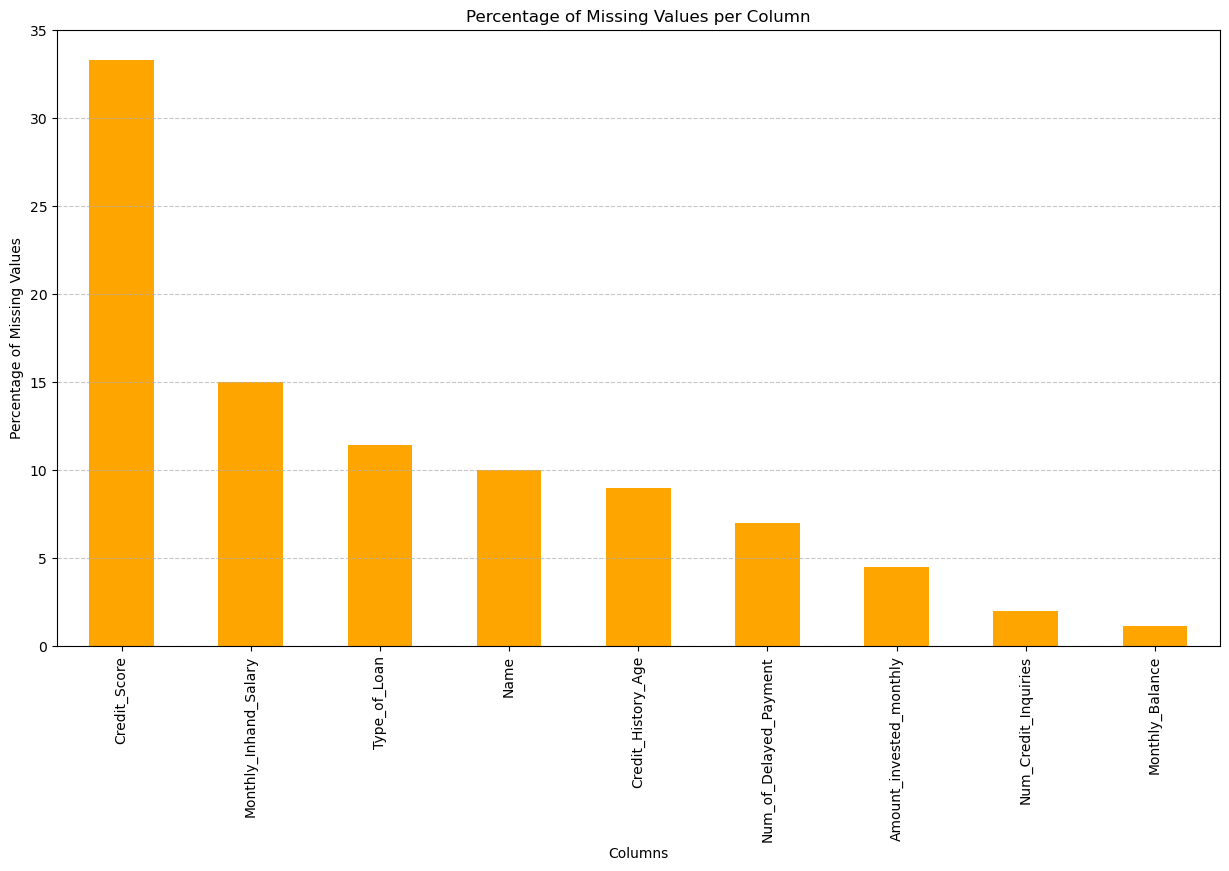

In [15]:
#Calculate the percentage of NaNs per column
na_percentage = (df.isna().sum() / len(df)) * 100

# Filter out columns with no missing values
na_percentage = na_percentage[na_percentage > 0]

# Sort by the percentage of missing values
na_percentage = na_percentage.sort_values(ascending=False)
print(na_percentage)
# Plot the percentage of missing values
plt.figure(figsize=(15, 8))
na_percentage.plot(kind='bar', color='orange')
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [16]:
na(df, True)


% of NaNs in df:


Credit_Score               0.333333
Monthly_Inhand_Salary      0.150000
Type_of_Loan               0.114080
Name                       0.100000
Credit_History_Age         0.090000
Num_of_Delayed_Payment     0.070000
Amount_invested_monthly    0.045000
Num_Credit_Inquiries       0.020000
Monthly_Balance            0.011747
dtype: float64

### cleaning data 

#### data issues

In [17]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [18]:
import pandas as pd
import re

class DataCleaner:
    def __init__(self, df):
        self.df = df

    def clean_column_names(self):
        """Nettoie les noms de colonnes en remplaçant espaces et caractères spéciaux."""
        self.df.columns = (
            self.df.columns.str.strip()
            .str.lower()
            .str.replace(r'[^a-z0-9_]', '_', regex=True)
        )
        return self

    def clean_numeric_columns(self, numeric_columns):
        """Nettoie uniquement les colonnes qui peuvent contenir des chiffres."""
        for col in numeric_columns:
            if col in self.df.columns and self.df[col].dtype == object:  # Vérifie si la colonne existe et contient du texte
                # Supprime caractères spéciaux et espaces
                self.df[col] = (
                    self.df[col]
                    .astype(str)
                    .str.replace(r'[^0-9.,-]', '', regex=True)  # Garde les nombres négatifs
                    .str.replace(',', '.', regex=True)  # Convertit les virgules en points
                )
                # Convertit en float/int
                self.df[col] = pd.to_numeric(self.df[col], errors='coerce')
        return self 
    def clean_data(self, numeric_columns):
        """Applique les corrections uniquement sur les colonnes numériques spécifiées."""
        return (
            self.clean_column_names()
            .clean_numeric_columns(numeric_columns)
            .df
        )
# Liste des colonnes à traiter
numeric_columns = [
    'age', 'annual_income', 'monthly_inhand_salary',
    'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan', 'delay_from_due_date',
    'num_of_delayed_payment', 'changed_credit_limit', 'num_credit_inquiries', 'outstanding_debt',
    'credit_utilization_ratio', 'credit_history_age', 'total_emi_per_month',
    'amount_invested_monthly', 'monthly_balance'
]
# Nettoyage
cleaner = DataCleaner(df)
df = cleaner.clean_data(numeric_columns)
print(df) 

             id customer_id      month            name   age          ssn  \
0        0x1602   CUS_0xd40    January   Aaron Maashoh    23  821-00-0265   
1        0x1603   CUS_0xd40   February   Aaron Maashoh    23  821-00-0265   
2        0x1604   CUS_0xd40      March   Aaron Maashoh  -500  821-00-0265   
3        0x1605   CUS_0xd40      April   Aaron Maashoh    23  821-00-0265   
4        0x1606   CUS_0xd40        May   Aaron Maashoh    23  821-00-0265   
...         ...         ...        ...             ...   ...          ...   
149995  0x25fe5  CUS_0x8600   December  Sarah McBridec  4975  031-35-0942   
149996  0x25fee  CUS_0x942c  September           Nicks    25  078-73-5990   
149997  0x25fef  CUS_0x942c    October           Nicks    25  078-73-5990   
149998  0x25ff0  CUS_0x942c   November           Nicks    25  078-73-5990   
149999  0x25ff1  CUS_0x942c   December           Nicks    25  078-73-5990   

       occupation  annual_income  monthly_inhand_salary  num_bank_accounts 

In [26]:
import pandas as pd

class DataCleaner:
    def __init__(self, df):
        """
        Initialise la classe avec le DataFrame à nettoyer.
        
        Paramètres :
        df (pd.DataFrame) : Le DataFrame contenant les données à nettoyer.
        """
        self.df = df

    def replace_invalid_values(self, column_name, valid_values, replacement_method='mode', custom_value=None):
        """
        Remplace les valeurs invalides dans une colonne par le mode ou une valeur spécifiée.
        
        Paramètres :
        column_name (str) : Le nom de la colonne à nettoyer.
        valid_values (list) : Liste des valeurs considérées comme valides.
        replacement_method (str) : Méthode de remplacement des valeurs invalides ('mode' ou 'custom').
        custom_value (str, optionnel) : Valeur personnalisée pour remplacer les valeurs invalides si 'custom' est choisi.
        
        Retourne :
        None : Met à jour le DataFrame en place.
        """
        if column_name not in self.df.columns:
            print(f"[WARNING] La colonne '{column_name}' n'existe pas dans le DataFrame.")
            return

        # Identifier les valeurs invalides
        invalid_mask = ~self.df[column_name].isin(valid_values)

        if replacement_method == 'mode':
            # Remplacer par la valeur la plus fréquente (mode)
            mode_value = self.df.loc[~invalid_mask, column_name].mode()[0]
            self.df.loc[invalid_mask, column_name] = mode_value
            print(f"[INFO] Les valeurs invalides de '{column_name}' ont été remplacées par le mode : {mode_value}.")
        elif replacement_method == 'custom':
            if custom_value is not None:
                self.df.loc[invalid_mask, column_name] = custom_value
                print(f"[INFO] Les valeurs invalides de '{column_name}' ont été remplacées par la valeur personnalisée : {custom_value}.")
            else:
                print("[ERROR] Veuillez fournir une valeur personnalisée pour le remplacement.")
        else:
            print("[ERROR] Méthode de remplacement non reconnue. Utilisez 'mode' ou 'custom'.")

    def fill_missing_values(self, column_name, method='mode', custom_value=None):
        """
        Remplit les valeurs manquantes dans une colonne par le mode ou une valeur spécifiée.
        
        Paramètres :
        column_name (str) : Le nom de la colonne à traiter.
        method (str) : Méthode de remplissage des valeurs manquantes ('mode' ou 'custom').
        custom_value (str, optionnel) : Valeur personnalisée pour le remplissage si 'custom' est choisi.
        
        Retourne :
        None : Met à jour le DataFrame en place.
        """
        if column_name not in self.df.columns:
            print(f"[WARNING] La colonne '{column_name}' n'existe pas dans le DataFrame.")
            return

        if method == 'mode':
            # Remplir avec la valeur la plus fréquente (mode)
            mode_value = self.df[column_name].mode()[0]
            self.df[column_name].fillna(mode_value, inplace=True)
            print(f"[INFO] Les valeurs manquantes de '{column_name}' ont été remplies avec le mode : {mode_value}.")
        elif method == 'custom':
            if custom_value is not None:
                self.df[column_name].fillna(custom_value, inplace=True)
                print(f"[INFO] Les valeurs manquantes de '{column_name}' ont été remplies avec la valeur personnalisée : {custom_value}.")
            else:
                print("[ERROR] Veuillez fournir une valeur personnalisée pour le remplissage.")
        else:
            print("[ERROR] Méthode de remplissage non reconnue. Utilisez 'mode' ou 'custom'.")

    def clean_column(self, column_name, valid_values, invalid_replacement_method='mode', missing_value_method='mode', custom_invalid_value=None, custom_missing_value=None):
        """
        Nettoie une colonne en remplaçant les valeurs invalides et en remplissant les valeurs manquantes.
        
        Paramètres :
        column_name (str) : Le nom de la colonne à nettoyer.
        valid_values (list) : Liste des valeurs considérées comme valides.
        invalid_replacement_method (str) : Méthode pour remplacer les valeurs invalides ('mode' ou 'custom').
        missing_value_method (str) : Méthode pour remplir les valeurs manquantes ('mode' ou 'custom').
        custom_invalid_value (str, optionnel) : Valeur personnalisée pour remplacer les valeurs invalides si 'custom' est choisi.
        custom_missing_value (str, optionnel) : Valeur personnalisée pour remplir les valeurs manquantes si 'custom' est choisi.
        
        Retourne :
        None : Met à jour le DataFrame en place.
        """
        self.replace_invalid_values(column_name, valid_values, invalid_replacement_method, custom_invalid_value)
        self.fill_missing_values(column_name, missing_value_method, custom_missing_value)

    def get_cleaned_data(self):
        """
        Retourne le DataFrame nettoyé.
        
        Retourne :
        pd.DataFrame : Le DataFrame après nettoyage.
        """
        return self.df
cleaner = DataCleaner(df)
df = cleaner.get_cleaned_data()

### missing values

In [27]:
df.isna().sum() 


id                              0
customer_id                     0
month                           0
name                        15000
age                             0
ssn                          8400
occupation                      0
annual_income                   0
monthly_inhand_salary       22500
num_bank_accounts               0
num_credit_card                 0
interest_rate                   0
num_of_loan                     0
type_of_loan                17112
delay_from_due_date             0
num_of_delayed_payment      10500
changed_credit_limit         3150
num_credit_inquiries         3000
credit_mix                      0
outstanding_debt                0
credit_utilization_ratio        0
credit_history_age          13500
payment_of_min_amount           0
total_emi_per_month             0
amount_invested_monthly      6750
payment_behaviour               0
monthly_balance              1762
credit_score                50000
dtype: int64

In [32]:
class MissingDataHandler:
    def __init__(self, df):
        self.df = df  # Appliquer les changements directement sur le DataFrame original
    # 1. Supprimer les colonnes avec trop de valeurs manquantes
    def drop_column(self, threshold=0.5):
        """Drop columns with more than threshold% missing values."""
        self.df.dropna(thresh=len(self.df) * (1 - threshold), axis=1, inplace=True)
    # 2. Supprimer les lignes avec des valeurs manquantes
    def drop_row(self):
        """Drop rows with any missing values."""
        self.df.dropna(inplace=True)
    # 3. Imputation avec la moyenne ou la médiane
    def impute_mean_median(self, strategy='mean'):
        """Impute missing values in all numerical columns with mean or median."""
        num_cols = self.df.select_dtypes(include=[np.number]).columns
        for col in num_cols:
            imputer = SimpleImputer(strategy=strategy)
            self.df[col] = imputer.fit_transform(self.df[[col]])
    
    def group_imputation(self, group_by, strategy='mean'):
        """Group-wise imputation using mean or median for all numerical columns."""
        num_cols = self.df.select_dtypes(include=[np.number]).columns
        for col in num_cols:
            self.df[col].fillna(self.df.groupby(group_by)[col].transform(strategy), inplace=True)
    # 4. Remplir par la valeur la plus fréquente (catégories)
    def impute_categorical(self, strategy='most_frequent', fill_value=None):
        """Impute missing values in all categorical columns."""
        cat_cols = self.df.select_dtypes(exclude=[np.number]).columns
        for col in cat_cols:
            if strategy == 'constant' and fill_value is not None:
                self.df[col].fillna(fill_value, inplace=True)
            else:
                imputer = SimpleImputer(strategy=strategy)
                self.df[col] = imputer.fit_transform(self.df[[col]]).ravel()
    # 5. Remplissage en avant et en arrière
    def forward_fill(self):
        """Forward fill missing values for all columns."""
        self.df.fillna(method='ffill', inplace=True)
    
    def backward_fill(self):
        """Backward fill missing values for all columns."""
        self.df.fillna(method='bfill', inplace=True)
    # 6. Interpolation (utile pour les séries temporelles)
    def interpolate(self, method='linear'):
        """Interpolate missing values for all numerical columns."""
        num_cols = self.df.select_dtypes(include=[np.number]).columns
        for col in num_cols:
            self.df[col].interpolate(method=method, inplace=True)
    # using KNN for all numerical columns
    def knn_imputation(self, n_neighbors=5):
        """Impute missing values using KNN for all numerical columns."""
        imputer = KNNImputer(n_neighbors=n_neighbors)
        self.df[:] = imputer.fit_transform(self.df)
    # using Iterative Imputer (MICE)
    def iterative_imputation(self):
        """Impute missing values using Iterative Imputer (MICE) for all numerical columns."""
        imputer = IterativeImputer()
        self.df[:] = imputer.fit_transform(self.df)
    
    def get_dataframe(self):
        """Return the processed DataFrame."""
        return self.df

In [33]:
# Importer la classe
handler = MissingDataHandler(df)
# Supprimer les colonnes avec plus de 50% de valeurs manquantes
handler.drop_column(threshold=0.9)
# Imputation des valeurs manquantes
handler.impute_mean_median(strategy='median')  # Impute par la moyenne pour les colonnes numériques
handler.impute_categorical(strategy='most_frequent')  # Impute par la valeur la plus fréquente pour les catégoriques
# Utiliser forward fill ou backward fill si nécessaire
handler.forward_fill()
# Récupérer le DataFrame traité
cleaned_df = handler.get_dataframe()
print("\nDataFrame après traitement :")
cleaned_df.info()
df=cleaned_df
df.describe()

C:\Users\HP\AppData\Local\Temp\ipykernel_14744\2129737926.py:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.df.fillna(method='ffill', inplace=True)



DataFrame après traitement :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        150000 non-null  object 
 1   customer_id               150000 non-null  object 
 2   month                     150000 non-null  object 
 3   name                      150000 non-null  object 
 4   age                       150000 non-null  float64
 5   ssn                       150000 non-null  object 
 6   occupation                150000 non-null  object 
 7   annual_income             150000 non-null  float64
 8   monthly_inhand_salary     150000 non-null  float64
 9   num_bank_accounts         150000 non-null  float64
 10  num_credit_card           150000 non-null  float64
 11  interest_rate             150000 non-null  float64
 12  num_of_loan               150000 non-null  float64
 13  type_of_loan  

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance
count,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05
mean,110.337940,1.730552e+05,4025.247868,17.006940,22.623447,71.234907,3.141093,21.063400,29.728047,10.363839,28.078433,1426.220376,32.283309,430.529493,1432.513579,616.189740,-3.333333e+22
std,684.066779,1.404215e+06,2958.412598,117.069476,129.143006,461.537193,63.910655,14.860154,216.575690,6.716338,192.527500,1155.127101,5.113315,660.704940,8403.759977,2002.975098,3.333178e+24
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,-3.333333e+26
25%,25.000000,1.945549e+04,1792.520417,3.000000,4.000000,8.000000,1.000000,10.000000,9.000000,5.420000,3.000000,566.072500,28.054731,147.000000,30.947775,77.018550,2.709494e+02
50%,33.000000,3.757861e+04,3091.000000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.410000,6.000000,1166.155000,32.297058,204.000000,71.280006,135.791445,3.367995e+02
75%,42.000000,7.279690e+04,5363.071667,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.640000,9.000000,1945.962500,36.487954,293.000000,166.279555,255.343797,4.679887e+02
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5799.000000,1496.000000,67.000000,4399.000000,36.970000,2597.000000,4998.070000,50.000000,3311.000000,82398.000000,10000.000000,1.606518e+03


### removing duplicated values 

In [35]:
def remove_duplicates(df, subset=None, keep='first', inplace=False):
    """
    Removes duplicate rows from the DataFrame and provides a summary of duplicates.
    Parameters:
        df (pd.DataFrame): The DataFrame from which to remove duplicates.
        subset (list): List of columns to consider for duplicate checking. 
                    If None, checks all columns.
        keep (str): Which duplicates to keep. Options:
            - 'first': Keep the first occurrence (default).
            - 'last': Keep the last occurrence.
            - 'none': Drop all duplicates.
        inplace (bool): If True, modifies the original DataFrame. 
                        If False, returns a new DataFrame.
    Returns:
        pd.DataFrame: DataFrame with duplicates removed (if inplace=False).
    """
    if keep not in ['first', 'last', 'none']:
        raise ValueError("keep must be one of 'first', 'last', or 'none'.")
    # Count duplicates before removal
    total_rows = len(df)
    duplicate_rows = df.duplicated(subset=subset, keep=False).sum()
    percentage_duplicates = (duplicate_rows / total_rows) * 100
    print(f"Total Rows: {total_rows}")
    print(f"Duplicate Rows: {duplicate_rows} ({percentage_duplicates:.2f}%)")
    if duplicate_rows == 0:
        print("No duplicates found. No rows removed.")
        return df if not inplace else None
    # Handle duplicate removal    if keep == 'none':
        # Drop all duplicates and keep only unique rows
        duplicated_mask = df.duplicated(subset=subset, keep=False)
        result = df[~duplicated_mask]
    else:
        # Use pandas built-in drop_duplicates
        result = df.drop_duplicates(subset=subset, keep=keep)
    # Count duplicates after removal
    remaining_rows = len(result)
    rows_removed = total_rows - remaining_rows
    print(f"Rows Removed: {rows_removed}")
    print(f"Remaining Rows: {remaining_rows}")
    if rows_removed > 0:
        print("Duplicates successfully removed.")
    else:
        print("No duplicates were removed.")
    if inplace:
        df.drop_duplicates(subset=subset, keep=keep, inplace=True)
    else:
        return result
remove_duplicates(df, subset=None, keep='first', inplace=False)

Total Rows: 150000
Duplicate Rows: 0 (0.00%)
No duplicates found. No rows removed.


,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,_,809.98,26.822620,221.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,3091.000000,3.0,...,Good,809.98,31.944960,204.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,3091.000000,3.0,...,Good,809.98,28.609352,223.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,3091.000000,3.0,...,Good,809.98,31.377862,224.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,225.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975.0,031-35-0942,Architect,20002.88,1929.906667,10.0,...,_,3571.70,34.780553,204.0,Yes,60.964772,146.486325,Low_spent_Small_value_payments,275.539570,Standard
149996,0x25fee,CUS_0x942c,September,Nicks,25.0,078-73-5990,Mechanic,39628.99,3091.000000,4.0,...,Good,502.38,27.758522,3111.0,NM,35.104023,181.442999,Low_spent_Small_value_payments,409.394562,Standard
149997,0x25fef,CUS_0x942c,October,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,36.858542,320.0,No,35.104023,10000.000000,Low_spent_Large_value_payments,349.726332,Standard
149998,0x25ff0,CUS_0x942c,November,Nicks,25.0,078-73-5990,Mechanic,39628.99,3091.000000,4.0,...,Good,502.38,39.139840,321.0,No,35.104023,97.598580,High_spent_Small_value_payments,463.238981,Standard


### outliers

In [36]:
class DataCleaner:
    def __init__(self, df):
        """
        Initializes the class with a DataFrame.
        
        Parameters:
            df (pd.DataFrame): The dataset to be cleaned.
        """
        self.df = df
        self.numeric_columns = self.df.select_dtypes(include=['number']).columns.to_list()

    def remove_na_inf(self):
        """Replaces infinite values with NaN and drops rows containing NaN."""
        self.df[self.numeric_columns] = self.df[self.numeric_columns].replace([np.inf, -np.inf], np.nan).dropna()
        print(" NaN and infinite values removed.")

    def detect_outliers_iqr(self):
        """
        Detects outliers using the Interquartile Range (IQR) method.
        
        Returns:
            A dictionary containing outlier indices for each column.
        """
        outliers_dict = {}

        for col in self.numeric_columns:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Find outlier indices
            outliers = self.df[(self.df[col] < lower_bound) | (self.df[col] > upper_bound)].index
            outliers_dict[col] = outliers

        return outliers_dict

    def drop_outliers(self):
        """Drops rows containing outliers based on the IQR method."""
        outliers_dict = self.detect_outliers_iqr()
        outlier_indices = set(index for indices in outliers_dict.values() for index in indices)
        self.df = self.df.drop(outlier_indices)
        print(" Outliers removed.")

    def replace_outliers_iqr(self):
        """Replaces outliers with the lower and upper IQR bounds (Winsorization)."""
        for col in self.numeric_columns:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            self.df[col] = np.where(self.df[col] < lower_bound, lower_bound, self.df[col])
            self.df[col] = np.where(self.df[col] > upper_bound, upper_bound, self.df[col])
        
        print(" Outliers replaced using IQR bounds.")

    def replace_outliers_median(self):
        """Replaces outliers with the column median."""
        for col in self.numeric_columns:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            median_value = self.df[col].median()

            self.df[col] = np.where((self.df[col] < lower_bound) | (self.df[col] > upper_bound), median_value, self.df[col])
        
        print(" Outliers replaced with median.")

    def replace_outliers_knn(self, n_neighbors=5):
        """Replaces outliers using K-Nearest Neighbors (KNN) imputation."""
        imputer = KNNImputer(n_neighbors=n_neighbors)
        self.df[self.numeric_columns] = imputer.fit_transform(self.df[self.numeric_columns])
        print(" Outliers replaced using KNN imputation.")

    def save_cleaned_data(self, filename="cleaned_data.csv"):
        """Saves the cleaned DataFrame as a CSV file."""
        self.df.to_csv(filename, index=False)
        print(f" Cleaned data saved to {filename}.")

    def clean_data(self, method="median"):
        """
        Cleans missing values and applies an outlier handling method.

        Parameters:
            method (str): The method to handle outliers ('drop', 'winsorization', 'median', 'knn').
        """
        self.remove_na_inf()  # Remove NaN and infinite values

        if method == "drop":
            self.drop_outliers()
        elif method == "winsorization":
            self.replace_outliers_iqr()
        elif method == "median":
            self.replace_outliers_median()
        elif method == "knn":
            self.replace_outliers_knn()
        else:
            print("Invalid method. Choose from 'drop', 'winsorization', 'median', 'knn'.")

        self.save_cleaned_data()

In [37]:
# Initialisation du DataCleaner
cleaner = DataCleaner(df)
# Nettoyage des données avec la méthode choisie
cleaner.clean_data(method="median")

 NaN and infinite values removed.
 Outliers replaced with median.
 Cleaned data saved to cleaned_data.csv.


### data type conversion

In [38]:
class DataTypeConverter:
    def __init__(self, df):
        """
        Initializes the class with a DataFrame.
        
        Parameters:
            df (pd.DataFrame): The dataset to be converted.
        """
        self.df = df 

    def convert_data_types(self):
        """
        Converts column data types based on their values:
        - Converts strings containing numbers to int/float.
        - Converts float columns with only integer values to int.
        - Converts boolean-like columns (0/1) to bool.
        - Converts date-like columns to datetime.
        - Converts categorical columns (few unique values) to category.
        """
        for col in self.df.columns:
            # Convert numeric strings to proper numbers
            if self.df[col].dtype == 'object':
                try:
                    self.df[col] = pd.to_numeric(self.df[col])
                except ValueError:
                    pass  # Keep as object if conversion fails
 # Convert float columns with only integer values to int
            if self.df[col].dtype == 'float64':
                if (self.df[col].dropna() % 1 == 0).all():
                    self.df[col] = self.df[col].astype(int)

            # Convert boolean-like columns (0/1) to bool
            if set(self.df[col].dropna().unique()) == {0, 1}:
                self.df[col] = self.df[col].astype(bool)

            # Convert date-like columns to datetime
            if self.df[col].dtype == 'object':
                try:
                    self.df[col] = pd.to_datetime(self.df[col])
                except ValueError:
                    pass  # Keep as object if not a valid date format
            
            # Convert categorical columns (few unique values) to category
            if self.df[col].dtype == 'object' and self.df[col].nunique() / len(self.df) < 0.05:
                self.df[col] = self.df[col].astype('category')

        print(" Data types converted successfully.")

    def get_dataframe(self):
        """Returns the converted DataFrame."""
        return self.df

In [39]:
# Initialize DataTypeConverter
converter = DataTypeConverter(df)

# Convert data types
converter.convert_data_types()

# Get the transformed DataFrame
df_converted = converter.get_dataframe()

C:\Users\HP\AppData\Local\Temp\ipykernel_14744\187327553.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col] = pd.to_datetime(self.df[col])
C:\Users\HP\AppData\Local\Temp\ipykernel_14744\187327553.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col] = pd.to_datetime(self.df[col])
C:\Users\HP\AppData\Local\Temp\ipykernel_14744\187327553.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col] = pd.to_datetime(self.df[col])
C:\Users\HP\AppData\Local\Temp\ipykernel_14744\187327553.py:39: UserWarning: Could not infer format, so each element w

 Data types converted successfully.


C:\Users\HP\AppData\Local\Temp\ipykernel_14744\187327553.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col] = pd.to_datetime(self.df[col])
C:\Users\HP\AppData\Local\Temp\ipykernel_14744\187327553.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col] = pd.to_datetime(self.df[col])
C:\Users\HP\AppData\Local\Temp\ipykernel_14744\187327553.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col] = pd.to_datetime(self.df[col])


### univariate analysis 

#### numerical variable

In [42]:
print('Df dtypes:')
print(df.dtypes.value_counts())


Df dtypes:
int32       9
float64     8
object      4
category    1
category    1
category    1
category    1
category    1
category    1
category    1
Name: count, dtype: int64


In [44]:
# Étape 1 : Extraire les types de chaque colonne dans un DataFrame
dtypes = df.dtypes.reset_index()
dtypes.columns = ['column', 'dtype']

# Étape 2 : Convertir les types en string (facultatif mais utile pour groupby)
dtypes['dtype'] = dtypes['dtype'].astype(str)

# Étape 3 : Afficher le nombre de colonnes par type de données
print('Df dtypes:')
print(dtypes.groupby('dtype').size())


Df dtypes:
dtype
category    7
float64     8
int32       9
object      4
dtype: int64


In [45]:
def numeric_analysis(df):
        return print(df.describe().T)
numeric_analysis(df)

                             count          mean           std          min  \
age                       150000.0     33.474273     10.621039    14.000000   
annual_income             150000.0  48054.943413  34718.322710  7005.930000   
monthly_inhand_salary     150000.0   3617.747083   2343.426810   303.645417   
num_bank_accounts         150000.0      5.375780      2.578379    -1.000000   
num_credit_card           150000.0      5.520833      2.046918     0.000000   
interest_rate             150000.0     14.500953      8.655835     1.000000   
num_of_loan               150000.0      3.510880      2.395156     0.000000   
delay_from_due_date       150000.0     19.412320     12.641837    -5.000000   
num_of_delayed_payment    150000.0     13.370273      6.062414    -3.000000   
changed_credit_limit      150000.0     10.119565      6.364913    -6.490000   
num_credit_inquiries      150000.0      6.272713      3.883406     0.000000   
outstanding_debt          150000.0   1249.626768    

In [46]:
def univariate_analysis(df, base_folder="univariate_analysis"):
        # Ensure the base folder exists
        if not os.path.exists(base_folder):
            os.makedirs(base_folder)
        
        # Select numeric columns
        numeric_cols = df.select_dtypes(include=['number']).columns
        
        for col in numeric_cols:
            # Create a folder for the analysis
            col_folder = os.path.join(base_folder, col)
            if not os.path.exists(col_folder):
                os.makedirs(col_folder)
            
            print(f"\nPerforming Univariate Analysis for: {col}")
            
            # Create a single figure with 2x2 layout
            fig, axes = plt.subplots(2, 2, figsize=(12, 10))
            fig.suptitle(f'Univariate Analysis for {col}', fontsize=16)
            
            # Bar Chart
            sns.barplot(
                x=df[col].value_counts().index, 
                y=df[col].value_counts().values, 
                palette="viridis", 
                ax=axes[0, 0]
            )
            axes[0, 0].set_title('Bar Chart')
            axes[0, 0].set_xlabel(col)
            axes[0, 0].set_ylabel('Frequency')
            
            # Box Plot
            sns.boxplot(y=df[col], palette="viridis", ax=axes[0, 1])
            axes[0, 1].set_title('Box Plot')
            axes[0, 1].set_xlabel(col)
            
            # Density Plot
            sns.kdeplot(df[col], fill=True, color="blue", alpha=0.6, ax=axes[1, 0])
            axes[1, 0].set_title('Density Plot')
            axes[1, 0].set_xlabel(col)
            axes[1, 0].set_ylabel('Density')
            
            # Histogram
            sns.histplot(df[col], kde=False, color="green", ax=axes[1, 1])
            axes[1, 1].set_title('Histogram')
            axes[1, 1].set_xlabel(col)
            axes[1, 1].set_ylabel('Frequency')
            
            # Adjust layout
            plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the main title
            
            # Save the combined plot
            combined_plot_path = os.path.join(col_folder, f"{col}_univariate_analysis.png")
            plt.savefig(combined_plot_path, bbox_inches='tight')
            plt.close()
            
            print(f"Combined plots for {col} saved in: {combined_plot_path}")

In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

def univariate_analysis(df, base_folder="univariate_analysis"):
    """
    Réalise une analyse univariée sur chaque variable numérique et catégorielle :
    histogrammes pour les numériques, countplots pour les catégorielles.
    """
    if not os.path.exists(base_folder):
        os.makedirs(base_folder)

    # Colonnes numériques
    numeric_cols = df.select_dtypes(include=['number']).columns

    for col in numeric_cols:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[col].dropna(), kde=True, color="skyblue")
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.savefig(f"{base_folder}/{col}_hist.png")
        plt.close()

    # Colonnes catégorielles
    cat_cols = df.select_dtypes(include=['object', 'category']).columns

    for col in cat_cols:
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10], palette="viridis")
        plt.title(f'Count of {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(f"{base_folder}/{col}_count.png")
        plt.close()

    print(f"✅ Univariate plots saved in '{base_folder}' folder.")



In [8]:
import pandas as pd

# Exemple de chargement de données depuis un fichier CSV
df = pd.read_csv(r"C:\Users\HP\Desktop\python\seconde_projet\webesite_data.csv") # Remplace par le vrai nom de ton fichier


C:\Users\HP\AppData\Local\Temp\ipykernel_8948\36431069.py:4: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\HP\Desktop\python\seconde_projet\webesite_data.csv") # Remplace par le vrai nom de ton fichier


In [13]:
def categorical_analysis(df):
    return print(df.select_dtypes(include='object').describe().T)
categorical_analysis(df)

                          count unique                               top  \
ID                       100000  50000                            0x160a   
Customer_ID              100000  12500                         CUS_0xd40   
Month                    100000      4                         September   
Name                      89970  10139                            Stevex   
Age                      100000    976                                39   
SSN                      100000  12501                         #F%$D@*&8   
Occupation               100000     16                           _______   
Annual_Income            100000  16121                         109945.32   
Num_of_Loan              100000    263                                 2   
Type_of_Loan              88592   6260                     Not Specified   
Num_of_Delayed_Payment    93004    443                                19   
Changed_Credit_Limit     100000   3927                                 _   
Credit_Mix  

In [14]:
print(df.columns)


Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')


In [15]:
len(df["Type_of_Loan"].unique())


6261

### multivarie analysis

In [16]:
target = "credit_score"


### multivariate analysis with respect to the target variable



In [21]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor

def multivariate_analysis(target, df, base_folder="multivariate_analysis", sample_frac=0.2):
    """
    Performs multivariate analysis with respect to the target variable.
    Outputs:
        - Categorical vs Target: Box plots or count plots.
        - Numeric vs Target: Scatter plots with density curves.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        target (str): The target variable for comparison.
        base_folder (str): Directory to save the analysis images.
        sample_frac (float): Fraction of data to sample for faster plotting.
    """
    # Ensure the base folder exists
    os.makedirs(base_folder, exist_ok=True)
    
    # Select categorical and numeric columns
    exclude_cols = {'id', 'customer_id', 'type_of_loan', 'name', 'ssn'}
    categorical_cols = [col for col in df.select_dtypes(include=['object', 'category']).columns if col not in exclude_cols]
    numeric_cols = [col for col in df.select_dtypes(include=['number']).columns if col not in exclude_cols and col != target]
    
    # --- Categorical vs Target ---
    cat_vs_target_folder = os.path.join(base_folder, "categorical_vs_target")
    os.makedirs(cat_vs_target_folder, exist_ok=True)
    
    def plot_categorical_vs_target(col):
        print(f"Analyzing Categorical vs Target: {target} vs {col}")
        
        plt.figure(figsize=(10, 6))
        if pd.api.types.is_numeric_dtype(df[target]):
            sns.boxplot(x=col, y=target, data=df)
            plt.title(f"{target} Distribution by {col}")
        else:
            sns.countplot(x=col, hue=target, data=df)
            plt.title(f"Count of {col} by {target}")
        plt.xlabel(col)
        plt.ylabel(target if pd.api.types.is_numeric_dtype(df[target]) else "Count")
        
        plot_path = os.path.join(cat_vs_target_folder, f"{target}_vs_{col}.png")
        plt.savefig(plot_path, bbox_inches='tight')
        plt.close()
        print(f"Saved: {plot_path}")
    
    # Parallelize the plotting for categorical vs target
    with ThreadPoolExecutor() as executor:
        executor.map(plot_categorical_vs_target, categorical_cols)
    
    # --- Numeric vs Target ---
    num_vs_target_folder = os.path.join(base_folder, "numeric_vs_target")
    os.makedirs(num_vs_target_folder, exist_ok=True)
    
    # Sample the data for faster plotting
    sampled_df = df.sample(frac=sample_frac, random_state=42)
    
    def plot_numeric_vs_target(col):
        print(f"Analyzing Numeric vs Target: {target} vs {col}")
        
        plt.figure(figsize=(10, 6))
        if pd.api.types.is_numeric_dtype(df[target]):
            sns.scatterplot(x=target, y=col, data=sampled_df, alpha=0.4, color='purple')
            sns.kdeplot(x=target, y=col, data=sampled_df, color="red", levels=3, linewidths=1)
            plt.title(f"{target} vs {col} (Scatter + Density)")
        else:
            sns.boxplot(x=target, y=col, data=sampled_df)
            plt.title(f"{col} Distribution by {target}")
        plt.xlabel(target)
        plt.ylabel(col)
        
        plot_path = os.path.join(num_vs_target_folder, f"{target}_vs_{col}.png")
        plt.savefig(plot_path, bbox_inches='tight')
        plt.close()
        print(f"Saved: {plot_path}")
    
    # Parallelize the plotting for numeric vs target
    with ThreadPoolExecutor() as executor:
        executor.map(plot_numeric_vs_target, numeric_cols)
    
    print("\n Multivariate Analysis Completed Successfully!")

In [22]:
multivariate_analysis(target, df, base_folder="multivariate_analysis", sample_frac=0.2)

Analyzing Categorical vs Target: credit_score vs ID
Analyzing Categorical vs Target: credit_score vs Customer_ID
Analyzing Categorical vs Target: credit_score vs Month
Analyzing Categorical vs Target: credit_score vs Name
Analyzing Categorical vs Target: credit_score vs Age
Analyzing Categorical vs Target: credit_score vs SSN
Analyzing Categorical vs Target: credit_score vs Occupation
Analyzing Categorical vs Target: credit_score vs Annual_Income
Analyzing Categorical vs Target: credit_score vs Num_of_Loan
Analyzing Categorical vs Target: credit_score vs Type_of_Loan
Analyzing Categorical vs Target: credit_score vs Num_of_Delayed_Payment
Analyzing Categorical vs Target: credit_score vs Changed_Credit_Limit
Analyzing Categorical vs Target: credit_score vs Credit_Mix
Analyzing Categorical vs Target: credit_score vs Outstanding_Debt
Analyzing Categorical vs Target: credit_score vs Credit_History_Age
Analyzing Categorical vs Target: credit_score vs Payment_of_Min_Amount
Analyzing Categoric

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

### Multyvarie Analysis advanced

In [25]:
def scatter_plot_combinations(target, df, base_folder="scatter_combinations"):
    """
    Generates scatter plots for all possible combinations between the target variable,
    one categorical variable, and one numerical variable.
    Outputs:
        - Scatter plots showing the relationship between target and numerical variable,
        colored by the categories of the categorical variable.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        target (str): The target variable for comparison.
        base_folder (str): Directory to save the scatter plots.
    """
    # Ensure the base folder exists
    if not os.path.exists(base_folder):
        os.makedirs(base_folder)
    
    # Select categorical and numeric columns
    exclude_cols = {'id', 'customer_id', 'type_of_loan', 'name', 'ssn'}
    categorical_cols = [col for col in df.select_dtypes(include=['object', 'category']).columns if col not in exclude_cols]
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    # Iterate through all combinations of categorical and numerical variables
    for cat_col in categorical_cols:
        if cat_col != target:  # Skip the target itself
            for num_col in numeric_cols:
                if num_col != target:  # Skip the target itself
                    print(f"\nCreating Scatter Plot: Target={target}, Categorical={cat_col}, Numerical={num_col}")
                    
                    # Plot
                    plt.figure(figsize=(10, 6))
                    sns.scatterplot(
                        x=num_col, 
                        y=target, 
                        hue=cat_col, 
                        data=df, 
                        palette="viridis", 
                        alpha=0.6
                    )
                    plt.title(f'{target} vs {num_col} by {cat_col}')
                    plt.xlabel(num_col)
                    plt.ylabel(target)
                    plt.legend(title=cat_col)
                    
                    # Save plot
                    plot_folder = os.path.join(base_folder, f"{target}_vs_{num_col}_by_{cat_col}")
                    if not os.path.exists(plot_folder):
                        os.makedirs(plot_folder)
                    plot_path = os.path.join(plot_folder, f"{target}_vs_{num_col}_by_{cat_col}.png")
                    plt.savefig(plot_path, bbox_inches='tight')
                    plt.close()
                    
                    print(f"Scatter Plot saved in: {plot_path}")
scatter_plot_combinations(target, df, base_folder="scatter_combinations")


Creating Scatter Plot: Target=credit_score, Categorical=ID, Numerical=Monthly_Inhand_Salary


ValueError: Could not interpret value `credit_score` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [26]:
print(df.columns.tolist())


['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']


In [27]:
target = "CreditScore"


In [30]:
"credit_score" in df.columns


False

### correlation matrix


In [31]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Supprimer les lignes contenant des NaN ou des inf
column_headers = df.columns.to_list()
quantitative_columns = [col for col in column_headers if df[col].dtype in ['int64', 'float64']]

# Nettoyage des valeurs infinies et manquantes
cleaned_df = df[quantitative_columns].replace([np.inf, -np.inf], np.nan).dropna()

# Vérifier si les valeurs infinies ou NaN ont disparu
print(cleaned_df.isna().sum())  # Devrait afficher 0 partout

def correlation_and_significance(numeric_df, base_folder="correlation_analysis"):
    """
    Generates a correlation matrix heatmap with significance markers.
    
    Parameters:
        numeric_df (pd.DataFrame): The cleaned DataFrame with numerical variables.
        base_folder (str): Directory to save the analysis images.
    """
    # Assurer l'existence du dossier de sauvegarde
    if not os.path.exists(base_folder):
        os.makedirs(base_folder)
    
    cols = numeric_df.columns
    # Calculer la matrice de corrélation
    corr_matrix = numeric_df.corr()
    
    # Initialiser la matrice des p-values
    p_values = pd.DataFrame(np.ones((len(cols), len(cols))), columns=cols, index=cols)
    
    # Calculer les p-values pour chaque paire de variables
    for row in cols:
        for col in cols:
            if row != col:
                _, p_value = pearsonr(numeric_df[row], numeric_df[col])
                p_values.loc[row, col] = p_value
    
    # --- Affichage de la matrice de corrélation avec significativité ---
    plt.figure(figsize=(14, 12))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

    # Ajouter des marqueurs de significativité
    for i in range(len(cols)):
        for j in range(len(cols)):
            if i != j:  # Ne pas marquer la diagonale
                p_val = p_values.iloc[i, j]
                x = j + 0.5
                y = i + 0.5
                
                # Vert si significatif (p < 0.05), rouge sinon
                color = 'green' if p_val < 0.05 else 'red'
                plt.plot(x, y, 'o', color=color)
    
    plt.title('Correlation Matrix with Significance (Numerical Variables)', fontsize=18)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    
    # Sauvegarde de l'image
    corr_plot_path = os.path.join(base_folder, "correlation_matrix_significance.png")
    plt.savefig(corr_plot_path, bbox_inches='tight')
    plt.close()
    
    print(f"Correlation matrix with significance saved in: {corr_plot_path}")

# Exécuter la fonction avec les données nettoyées
correlation_and_significance(cleaned_df, base_folder="correlation_analysis")

Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Delay_from_due_date         0
Num_Credit_Inquiries        0
Credit_Utilization_Ratio    0
Total_EMI_per_month         0
dtype: int64
Correlation matrix with significance saved in: correlation_analysis\correlation_matrix_significance.png


### Generale Analysis


In [40]:
df.columns


Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

#### 1. What is the average number of delayed payments per credit score category?

In [41]:
grouped_data = df.groupby("Monthly_Inhand_Salary")["num_of_delayed_payment"].mean().reset_index()
grouped_data

KeyError: 'Column not found: num_of_delayed_payment'

In [34]:
print(df.columns)


Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')


In [43]:
print(df.columns)


Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')


In [44]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
